In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy import distance

geolocator = Nominatim(user_agent="clinics-near-me")

df = pd.read_csv("csv/2019-by-clinic-gcode.csv")
df.head()

,OrderID,CurrentClinicName1,CurrentClinicName2,CurrentClinicCity,CurrentClinicState,MedicalDirector,ND_NumIntentRet1,ND_NumIntentRet2,ND_NumIntentRet3,ND_NumIntentRet4,...,EggCryoService,GestCarrierService,SARTmember,LabAccred,NumResearch,CurrentStateAbbrev,gcode,point,lat,lon
0,1,ART FERTILITY PROGRAM OF ALABAMA,NaN,BIRMINGHAM,ALABAMA,"Michael C Allemand, MD",134,54,35,12,...,Yes,Yes,Yes,Yes,0,AL,"Birmingham, Jefferson County, Alabama, United ...","(33.5206824, -86.8024326, 0.0)",33.520682,-86.802433
1,2,UNIVERSITY OF ALABAMA AT BIRMINGHAM,REPRODUCTIVE ENDOCRINOLOGY AND INFERTILITY,BIRMINGHAM,ALABAMA,"Deidre D. Gunn, MD",44,13,10,*,...,Yes,Yes,Yes,Yes,0,AL,"Birmingham, Jefferson County, Alabama, United ...","(33.5206824, -86.8024326, 0.0)",33.520682,-86.802433
2,3,ALABAMA FERTILITY SPECIALISTS,NaN,HOMEWOOD,ALABAMA,"Mamie R McLean, MD",117,46,30,22,...,Yes,Yes,Yes,Yes,0,AL,"Homewood, Jefferson County, Alabama, United St...","(33.4717732, -86.8008228, 0.0)",33.471773,-86.800823
3,4,FERTILITY INSTITUTE OF NORTH ALABAMA,NaN,HUNTSVILLE,ALABAMA,"Brett Davenport, MD",0,0,0,0,...,Yes,Yes,No,Pending,0,AL,"Huntsville, Madison County, Alabama, United St...","(34.729847, -86.5859011, 0.0)",34.729847,-86.585901
4,5,CENTER FOR REPRODUCTIVE MEDICINE,NaN,MOBILE,ALABAMA,"George T. Koulianos, MD",78,45,43,13,...,Yes,Yes,Yes,Yes,0,AL,"Mobile, Mobile County, Alabama, United States","(30.6943566, -88.0430541, 0.0)",30.694357,-88.043054


In [2]:
my_location = geolocator.geocode("1033 Cordova St, Pasadena, California")
my_coords = tuple(my_location.point)
print(my_coords)

(34.14312635, -118.12898295, 0.0)


In [5]:
df['distance'] = df.apply(lambda x: distance.distance(my_coords, (x.lat,x.lon)).miles, axis=1)
closest = df.nsmallest(10,'distance')
closest

,OrderID,CurrentClinicName1,CurrentClinicName2,CurrentClinicCity,CurrentClinicState,MedicalDirector,ND_NumIntentRet1,ND_NumIntentRet2,ND_NumIntentRet3,ND_NumIntentRet4,...,GestCarrierService,SARTmember,LabAccred,NumResearch,CurrentStateAbbrev,gcode,point,lat,lon,distance
59,60,HRC FERTILITY,NaN,PASADENA,CALIFORNIA,"John G. Wilcox, MD",602,442,419,453,...,Yes,Yes,Yes,0,CA,"Pasadena, California, United States","(34.1476452, -118.1444779, 0.0)",34.147645,-118.144478,0.941014
60,61,"UNITY FERTILITY CENTER, LLC",NaN,PASADENA,CALIFORNIA,"Chun-Yeh Wang, MD, PhD",10,*,7,14,...,Yes,No,Yes,0,CA,"Pasadena, California, United States","(34.1476452, -118.1444779, 0.0)",34.147645,-118.144478,0.941014
32,33,CARE FERTILITY,NaN,GLENDALE,CALIFORNIA,"Rudy Quintero, MD",71,39,50,26,...,Yes,Yes,Yes,0,CA,"Glendale, California, United States","(34.1469416, -118.2478471, 0.0)",34.146942,-118.247847,6.816881
33,34,"KATHLEEN KORNAFEL, MD PHD",NaN,GLENDALE,CALIFORNIA,"KATHLEEN KORNAFEL, MD, PhD",0,0,0,0,...,Yes,Yes,Yes,0,CA,"Glendale, California, United States","(34.1469416, -118.2478471, 0.0)",34.146942,-118.247847,6.816881
40,41,CALIFORNIA FERTILITY PARTNERS,NaN,LOS ANGELES,CALIFORNIA,"Richard P. Marrs, MD",70,117,146,245,...,Yes,Yes,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764
41,42,CEDARS SINAI MEDICAL CENTER,CENTER FOR FERTILITY AND REPRODUCTIVE MEDICINE,LOS ANGELES,CALIFORNIA,"Margareta D. Pisarska, MD",18,23,17,23,...,Yes,Yes,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764
42,43,CHA FERTILITY CENTER,NaN,LOS ANGELES,CALIFORNIA,"Joshua J. Berger, MD, PhD",19,20,49,47,...,Yes,Yes,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764
43,44,CMD FERTILITY,NaN,LOS ANGELES,CALIFORNIA,"Catherine M. DeUgarte, MD",27,21,34,35,...,Yes,No,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764
44,45,PACIFIC FERTILITY CENTER-LOS ANGELES,NaN,LOS ANGELES,CALIFORNIA,"Vicken Sahakian, MD",0,0,0,0,...,Yes,Yes,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764
45,46,REPRODUCTIVE MEDICINE ASSOCIATES OF SOUTHERN C...,NaN,LOS ANGELES,CALIFORNIA,"Thomas Kim, MD",0,0,0,0,...,Yes,Yes,Yes,0,CA,"Los Angeles, California, United States","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,8.975764


In [7]:
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
m = folium.Map(location=closest[["lat", "lon"]].mean().to_list(), zoom_start=10)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(m)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
for i,r in closest.iterrows():
    location = (r["lat"], r["lon"])
    folium.Marker(location=location,
                      popup = r['CurrentClinicCity'],
                      tooltip=r['CurrentClinicName1'])\
    .add_to(marker_cluster)
# display the map
m

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

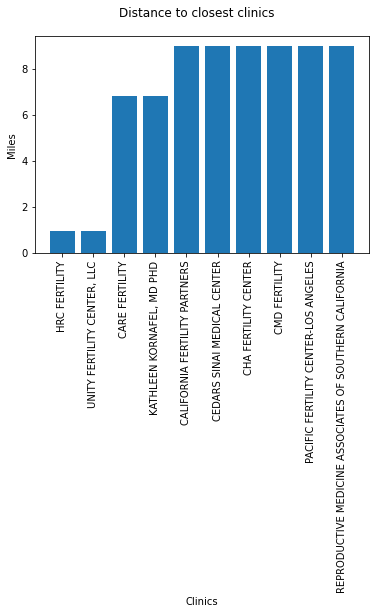

In [24]:
plt.bar(closest.CurrentClinicName1, closest.distance)
plt.suptitle('Distance to closest clinics')
plt.xticks(rotation='vertical')
plt.xlabel('Clinics')
plt.ylabel('Miles')
plt.show()

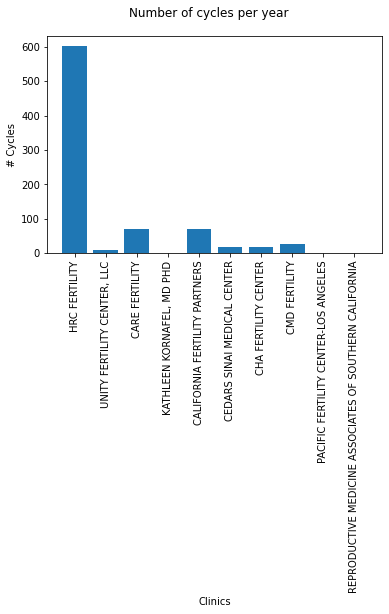

In [28]:
plt.bar(closest.CurrentClinicName1, closest.ND_NumIntentRet1)
plt.suptitle('Number of cycles per year')
plt.xticks(rotation='vertical')
plt.xlabel('Clinics')
plt.ylabel('# Cycles')
plt.show()

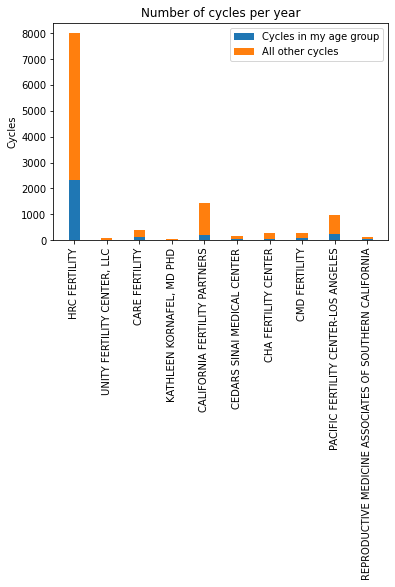

In [36]:
closest[["TotNumCycles1","TotNumCyclesAll"]] = closest[["TotNumCycles1","TotNumCyclesAll"]].apply(pd.to_numeric)

labels = closest.CurrentClinicName1
cycles_my_age = closest.TotNumCycles1
cycles_all = closest.TotNumCyclesAll - cycles_my_age
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, cycles_my_age, width, label='Cycles in my age group')
ax.bar(labels, cycles_all, width, bottom=cycles_my_age, label='All other cycles')
ax.set_ylabel('Cycles')
ax.set_title('Number of cycles per year')
ax.legend()

plt.xticks(rotation='vertical')
plt.show()